# Notebook for preliminary data analysis

In [2]:
%run ./rob_setup_notebook.ipynb
    
import utils.ia_funcs as ia 
import utils.utils_funcs as uf
import utils.gsheets_importer as gsi
from utils.paq2py import *

session_type = 'sensory_nodetrend'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Suite2p path: ['/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/suite2p']
QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Figures 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


## Gain calculations from plastic slide images

Ch2 700 50 done
Ch2 700 80 done
Ch2 700 110 done
Ch2 700 140 done
Ch2 700 170 done
Ch2 700 200 done
Ch2 700 230 done
Ch2 600 50 done
Ch2 600 80 done
Ch2 600 110 done
Ch2 600 140 done
Ch2 600 170 done
Ch2 600 200 done
Ch2 600 230 done
Ch2 500 50 done
Ch2 500 80 done
Ch2 500 110 done
Ch2 500 140 done
Ch2 500 170 done
Ch2 500 200 done
Ch2 500 230 done
Ch3 700 50 done
Ch3 700 80 done
Ch3 700 110 done
Ch3 700 140 done
Ch3 700 170 done
Ch3 700 200 done
Ch3 700 230 done
Ch3 600 50 done
Ch3 600 80 done
Ch3 600 110 done
Ch3 600 140 done
Ch3 600 170 done
Ch3 600 200 done
Ch3 600 230 done
Ch3 500 50 done
Ch3 500 80 done
Ch3 500 110 done
Ch3 500 140 done
Ch3 500 170 done
Ch3 500 200 done
Ch3 500 230 done


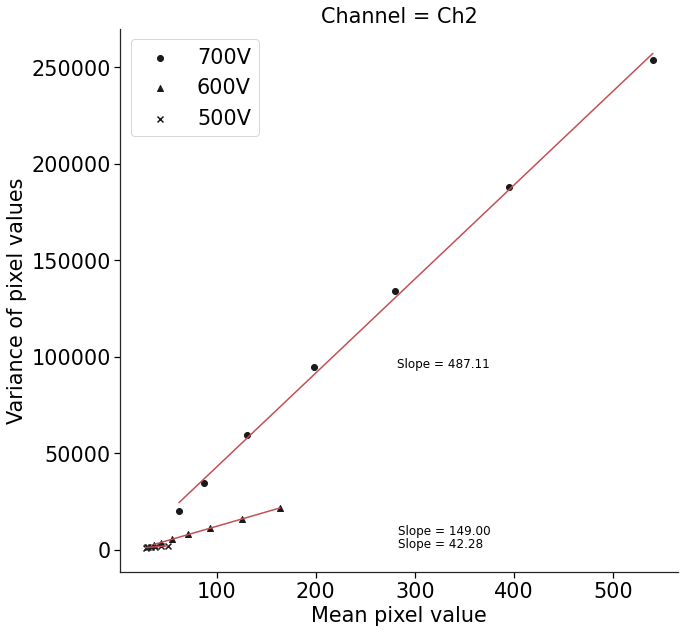

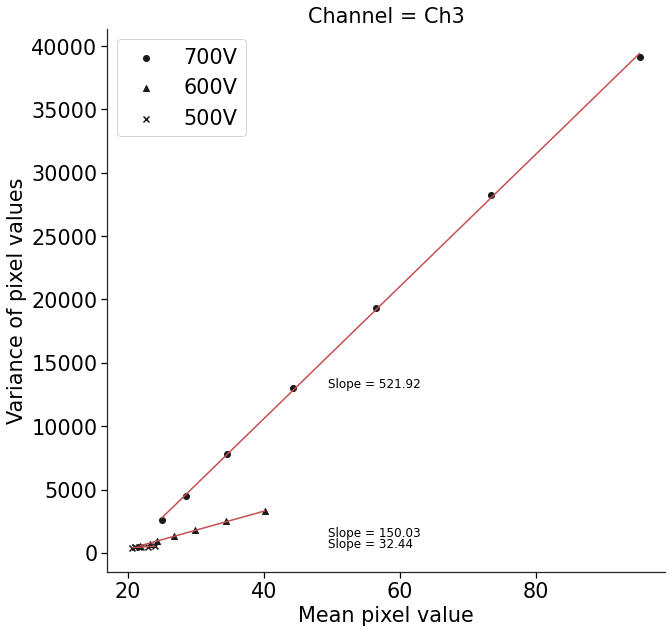

In [78]:
path = '/home/apacker/mnt/qnap/Data/2021-10-19/'

all_dirs = np.sort([folder for folder in os.listdir(path) if '_t' in folder])

dir_lists = [all_dirs[14:], all_dirs[7:14], all_dirs[:7]]
pmt_gains = ['700', '600', '500']
powers = [50, 80, 110, 140, 170, 200, 230]
channels = ['Ch2', 'Ch3']
markers = ['o', '^', 'x']

m = np.empty([len(channels), len(pmt_gains), len(powers)])
v = np.empty([len(channels), len(pmt_gains), len(powers)])

for ch_i, channel in enumerate(channels):    
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    
    for gain_i, (pmt_gain, dir_list, marker) in enumerate(zip(pmt_gains, dir_lists, markers)):
        for power_i, (power, folder) in enumerate(zip(powers, dir_list)):
            for file in os.listdir(os.path.join(path, folder)):
                if all(s in file for s in [channel, '.tif']):
                    tiff = tf.imread(os.path.join(path, folder, file))

                    m[ch_i, gain_i, power_i] = np.mean(tiff)
                    v[ch_i, gain_i, power_i] = np.var(tiff, ddof=1)
                    
                    print(channel, pmt_gain, power, 'done')
        
        plt.scatter(m[ch_i, gain_i], v[ch_i, gain_i], color='k', label=pmt_gain + 'V', marker=marker)
        plt.legend()
        
        slope, intercept, r_value, p_value, se = stats.linregress(m[ch_i, gain_i], v[ch_i, gain_i])
        y = (slope*m[ch_i, gain_i]) + intercept
        plt.plot(m[ch_i, gain_i], y, color='r')
        
        ax = plt.gca()
        text_x = ax.get_xlim()[1]/2
        plt.text(text_x, np.median(v[ch_i, gain_i]), 'Slope = {0:.2f}'.format(slope))
        
    axes.set_xlabel('Mean pixel value')
    axes.set_ylabel('Variance of pixel values')
    axes.set_title('Channel = ' + channel)
    
    save_path = os.path.join(qnap_path, channel + '_gain_mean_vs_variance_plot')
    ia.savePlot(save_path)

### Add or check attributes in all session objects

In [ ]:
sheet_names = ['2019-06-11_J048',
                '2019-06-13_J052',
                '2019-06-25_RL048',
                '2019-07-15_RL052',
                '2019-08-14_J058',
                '2019-08-14_J059',
                '2019-08-15_RL055',
                '2019-11-14_J061',
                '2019-11-14_J063',
                '2019-11-15_J064',
                '2019-11-18_J065',
                '2020-02-27_RL075',
                '2020-03-03_RL074',
                '2020-03-05_RL070',
                '2020-03-05_RL072']

s1s2_coords = [[294, 119, 750, 166],
                [213, 165, 735, 234],
                [148, 203, 760, 175],
                [177, 332, 825, 404],
                [291, 183, 715, 345],
                [148, 114, 764, 203],
                [132, 273, 659, 328],
                [341, 453, 700, 535],
                [264, 481, 657, 605],
                [412, 440, 703, 580],
                [304, 515, 637, 625],
                [239, 452, 571, 456],
                [244, 453, 743, 567],
                [269, 429, 843, 520],
                [327, 519, 807, 607]]

# # To add s1/s2 coords to pickled objects
# for sheet_name, [s1_x, s1_y, s2_x, s2_y] in zip(sheet_names, s1s2_coords):
#     if sheet_name in pkl:
#         ses_obj.s1_coord = [s1_x, s1_y]
#         ses_obj.s2_coord = [s2_x, s2_y]

In [ ]:
pkl_files = [p for p in os.listdir(pkl_folder) if '.pkl' in p]
pkl_files.sort()

for pkl in pkl_files:
        
    print(pkl)

    pkl_path = os.path.join(pkl_folder, pkl)

    with open(pkl_path, 'rb') as f:
        ses_obj = pickle.load(f)

    exp_list = [ses_obj.photostim_r, ses_obj.photostim_s]

    if ses_obj.spont.n_frames > 0:
        exp_list.append(ses_obj.spont)

    if ses_obj.whisker_stim.n_frames > 0:
        exp_list.append(ses_obj.whisker_stim)

    for exp_obj in exp_list:

#     with open(pkl_path, 'wb') as f:
#         pickle.dump(ses_obj, f)

## Smoothing line plots

In [ ]:
box_pts=4
box = np.ones(box_pts)/box_pts
y_smooth = np.convolve(y, box, mode='same')
print(y_smooth[0:5], y[:5])

In [ ]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [ ]:
cell = 4

y = smooth(exp_obj.all_trials[0][cell,:,0], 4)
    
plt.figure(figsize=(15,5))
plt.plot(y);
plt.plot(exp_obj.all_trials[0][cell,:,0])
plt.hlines(0, xmin=0, xmax=180, linestyles='dashed');

### Play with data from individual session objects

In [ ]:
# List of pickle object file names, i.e. experiments that have been analysed
# '2019-06-11_J048', # -- OBFOV shallow 
# '2019-06-13_J052', # -- OBFOV shallow 
# '2019-06-25_RL048', # -- OBFOV shallow 
# '2019-07-15_RL052', # -- OBFOV shallow 
# '2019-08-14_J058', # -- OBFOV shallow 
# '2019-08-14_J059', # -- OBFOV shallow 
# '2019-08-15_RL055', # -- OBFOV shallow 
# '2019-11-14_J061', # -- shallow 
# '2019-11-14_J063', # -- shallow
# '2019-11-15_J064', # -- shallow
# '2019-11-18_J065', # -- shallow
# '2020-02-27_RL075', # -- shallow
# '2020-03-03_RL074', # -- shallow
# '2020-03-05_RL070', # -- shallow
# '2020-03-05_RL072', # -- shallow
# '2020-06-03_RL086', # -- shallow (JR stim)
##===NOT ANALYSED===##
# '2020-03-12_RL070', # -- deep
# '2020-03-16_RL074', # -- deep
# '2020-03-19_RL075', # -- deep
# '2020-06-08_RL086', # -- deep
##===NOT ANALYSED===##
# '2020-06-15_RL086', # -- auditory
# '2020-03-20_RL080', # -- shallow (failed)
# '2020-09-03_RL091', # -- shallow
# '2020-09-04_RL093', # -- shallow
# '2020-09-08_RL095', # -- shallow
# '2020-09-08_RL099', # -- shallow
# '2020-09-09_RL096', # -- shallow
# '2020-09-09_RL100', # -- shallow
# '2020-09-14_RL101', # -- shallow
# '2020-09-15_RL102', # -- shallow
# '2020-09-16_RL103', # -- shallow
# '2020-10-02_RL108', # -- shallow
# '2020-10-12_RL109', # -- shallow
# '2020-10-29_RL111', # -- projection
# '2020-12-10_RL115', # -- projection
# '2021-01-06_RL120', # -- interneuron
# '2021-01-20_RL121', # -- interneuron
# '2021-01-20_RL125', # -- interneuron
# '2021-01-20_RL124', # -- interneuron
# '2021-01-28_RL124', # -- interneuron
# '2021-02-18_RL127', # -- projection
# '2021-02-22_RL128', # -- projection
# '2021-02-23_RL129', # -- projection
# '2021-02-24_RL132', # -- projection
# '2021-02-25_RL131', # -- projection
# '2021-03-02_RL130', # -- projection

pkl_path = os.path.join(pkl_folder, 'sensory', '2020-09-04_RL093.pkl')

with open(pkl_path, 'rb') as f:
    ses_obj = pickle.load(f)
    
print('Loaded pickled object.')

In [ ]:
# Show all attributes in ses_obj or exp_objs
print('Session object attributes')
for key, value in vars(ses_obj).items():
    print(key, type(value))

print('\nExperimental object attributes')
for key, value in vars(ses_obj.spont).items():
    print(key, type(value))